<a href="https://colab.research.google.com/github/VivianaEVV/Caso-practico-Curso-Analisis-de-Datos-de-Google-Specialization/blob/main/Caso_Practico_Cyclistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se crea una lista para almacenar DataFrames


In [1]:
import os
import pandas as pd # Se importan las librerías

# Define la ruta de la carpeta donde están los archivos CSV
folder_path = '/content/Archivos_AD'

# Obtiene la lista de todos los archivos CSV en la carpeta
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Lista para almacenar cada DataFrame
dataframes = []

Lee cada archivo CSV y almacenarlo en una lista

In [2]:
# Itera sobre cada archivo CSV en la carpeta
for file in csv_files:
    # Construye la ruta completa del archivo
    file_path = os.path.join(folder_path, file)

    # Lee el archivo CSV y lo almacena en un DataFrame
    df = pd.read_csv(file_path)

    # Agrega el DataFrame a la lista
    dataframes.append(df)


In [3]:
# Concatena todos los DataFrames en uno solo
df_completo = pd.concat(dataframes, ignore_index=True)

# Muestra las primeras filas del DataFrame combinado
print(df_completo.head())

            ride_id  rideable_type           started_at             ended_at  \
0  C1D650626C8C899A  electric_bike  2024-01-12 15:30:27  2024-01-12 15:37:59   
1  EECD38BDB25BFCB0  electric_bike  2024-01-08 15:45:46  2024-01-08 15:52:59   
2  F4A9CE78061F17F7  electric_bike  2024-01-27 12:27:19  2024-01-27 12:35:19   
3  0A0D9E15EE50B171   classic_bike  2024-01-29 16:26:17  2024-01-29 16:56:06   
4  33FFC9805E3EFF9A   classic_bike  2024-01-31 05:43:23  2024-01-31 06:09:35   

           start_station_name start_station_id           end_station_name  \
0           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
1           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
2           Wells St & Elm St     KA1504000135   Kingsbury St & Kinzie St   
3      Wells St & Randolph St     TA1305000030  Larrabee St & Webster Ave   
4  Lincoln Ave & Waveland Ave            13253   Kingsbury St & Kinzie St   

  end_station_id  start_lat  start_lng    end_lat    end

In [4]:
# Crear una copia del DataFrame con las columnas renombradas
df_analisis = df_completo.rename(columns={
    'ride_id': 'id_viaje',
    'rideable_type': 'tipo_bicicleta',
    'started_at': 'inicio_viaje',
    'ended_at': 'fin_viaje',
    'start_station_name': 'nombre_estacion_inicio',
    'start_station_id': 'id_estacion_inicio',
    'end_station_name': 'nombre_estacion_fin',
    'end_station_id': 'id_estacion_fin',
    'start_lat': 'latitud_inicio',
    'start_lng': 'longitud_inicio',
    'end_lat': 'latitud_fin',
    'end_lng': 'longitud_fin',
    'member_casual': 'tipo_usuario'
})

# Verificar los nuevos nombres de columnas
print(df_analisis.columns)

Index(['id_viaje', 'tipo_bicicleta', 'inicio_viaje', 'fin_viaje',
       'nombre_estacion_inicio', 'id_estacion_inicio', 'nombre_estacion_fin',
       'id_estacion_fin', 'latitud_inicio', 'longitud_inicio', 'latitud_fin',
       'longitud_fin', 'tipo_usuario'],
      dtype='object')


In [5]:
# Revisión inicial
print(df_analisis.info())
print(df_analisis.describe()) #Se muestran las columnas con sus respectivos índices, nombres y tipos de datos (Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860568 entries, 0 to 5860567
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   id_viaje                object 
 1   tipo_bicicleta          object 
 2   inicio_viaje            object 
 3   fin_viaje               object 
 4   nombre_estacion_inicio  object 
 5   id_estacion_inicio      object 
 6   nombre_estacion_fin     object 
 7   id_estacion_fin         object 
 8   latitud_inicio          float64
 9   longitud_inicio         float64
 10  latitud_fin             float64
 11  longitud_fin            float64
 12  tipo_usuario            object 
dtypes: float64(4), object(9)
memory usage: 581.3+ MB
None
       latitud_inicio  longitud_inicio   latitud_fin  longitud_fin
count    5.860568e+06     5.860568e+06  5.853336e+06  5.853336e+06
mean     4.190218e+01    -8.764622e+01  4.190258e+01 -8.764644e+01
std      4.474907e-02     2.748958e-02  5.598336e-02  1.136824e-01
min  

Identificar columnas con valores faltantes.

In [6]:
# Verificar valores faltantes
print(df_analisis.isnull().sum())

# Imputar valores (por ejemplo, rellenar con "Desconocido" en columnas de texto)
df_analisis['nombre_estacion_inicio'] = df_analisis['nombre_estacion_inicio'].fillna('Desconocido')

id_viaje                        0
tipo_bicicleta                  0
inicio_viaje                    0
fin_viaje                       0
nombre_estacion_inicio    1073951
id_estacion_inicio        1073951
nombre_estacion_fin       1104653
id_estacion_fin           1104653
latitud_inicio                  0
longitud_inicio                 0
latitud_fin                  7232
longitud_fin                 7232
tipo_usuario                    0
dtype: int64


El resultado indica que tus datos tienen valores faltantes(NaN) en varias columnas:

nombre_estacion_inicio y id_estacion_inicio → 1.073.951 valores faltantes.
nombre_estacion_fin y id_estacion_fin → 1.104.653 valores faltantes.
latitud_fin y longitud_fin → 7.232 valores faltantes.

In [7]:
# Rellenar valores faltantes en las columnas de estaciones
df_analisis['nombre_estacion_inicio'] = df_analisis['nombre_estacion_inicio'].fillna('Desconocido')
df_analisis['nombre_estacion_fin'] = df_analisis['nombre_estacion_fin'].fillna('Desconocido')

# Opcional: Rellenar latitud/longitud con 0 si falta (o descartar las filas si es crítico)
df_analisis['latitud_fin'] = df_analisis['latitud_fin'].fillna(0)
df_analisis['longitud_fin'] = df_analisis['longitud_fin'].fillna(0)

In [8]:
# Verificar coherencia de fechas
df_analisis = df_analisis[df_analisis['inicio_viaje'] < df_analisis['fin_viaje']]

Detectar valores atípicos en la duración del viaje. Revisar la columna duracion_viaje para valores inusualmente altos o bajos.

In [9]:
# Asegurarse de que las columnas sean de tipo string
df_analisis['inicio_viaje'] = df_analisis['inicio_viaje'].astype(str)
df_analisis['fin_viaje'] = df_analisis['fin_viaje'].astype(str)

# Eliminar milisegundos, si es que existen de las columnas de fecha
df_analisis['inicio_viaje'] = df_analisis['inicio_viaje'].str.split('.', expand=True)[0]
df_analisis['fin_viaje'] = df_analisis['fin_viaje'].str.split('.', expand=True)[0]

# Convertir las columnas de fecha a formato datetime
df_analisis['inicio_viaje'] = pd.to_datetime(df_analisis['inicio_viaje'], errors='coerce')
df_analisis['fin_viaje'] = pd.to_datetime(df_analisis['fin_viaje'], errors='coerce')

# Calcular la duración del viaje
df_analisis['duracion_viaje'] = (df_analisis['fin_viaje'] - df_analisis['inicio_viaje']).dt.total_seconds() / 60  # duración en minutos

# Eliminar viajes con duración negativa o excesiva (ej. mayores a 24 horas)
df_analisis = df_analisis[(df_analisis['duracion_viaje'] > 0) & (df_analisis['duracion_viaje'] <= 1440)]

Distribución de la duración del viaje

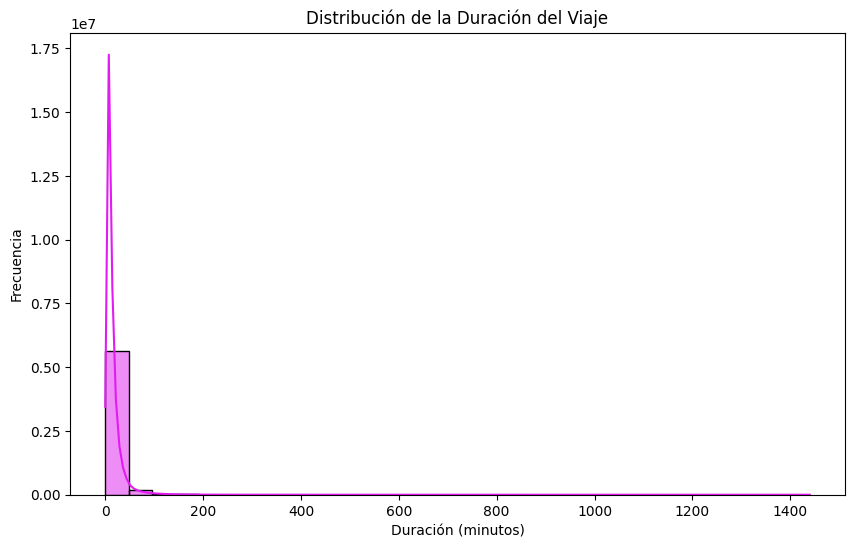

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la duración del viaje
plt.figure(figsize=(10, 6))
sns.histplot(df_analisis['duracion_viaje'], kde=True, bins=30, color='#e11cf1')
plt.title('Distribución de la Duración del Viaje')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

Distribución de viajes por día de la semana

         inicio_viaje dia_semana
0 2024-01-12 15:30:27    Viernes
1 2024-01-08 15:45:46      Lunes
2 2024-01-27 12:27:19     Sábado
3 2024-01-29 16:26:17      Lunes
4 2024-01-31 05:43:23  Miércoles


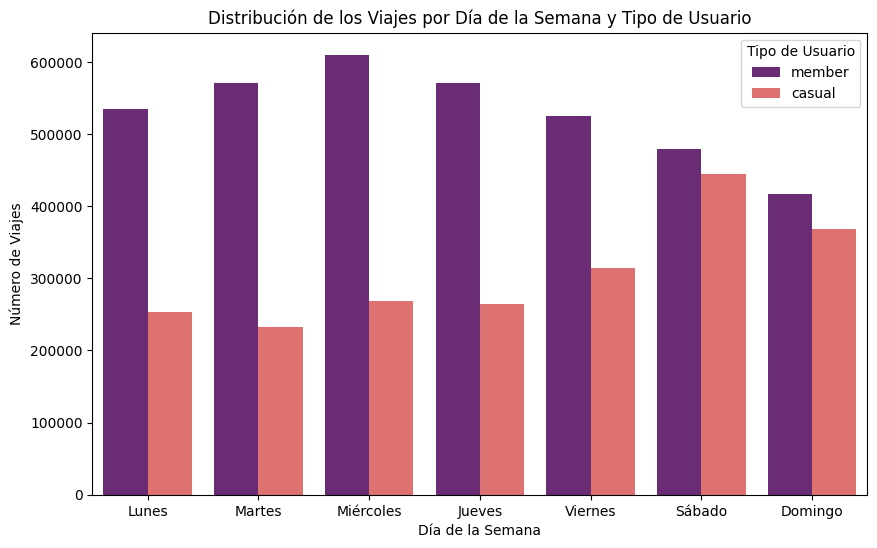

In [11]:
# Asegurarse de que 'inicio_viaje' esté en formato datetime
df_analisis['inicio_viaje'] = pd.to_datetime(df_analisis['inicio_viaje'], errors='coerce')

# Crear la columna 'dia_semana' que contiene el nombre del día
df_analisis['dia_semana'] = df_analisis['inicio_viaje'].dt.day_name()

# Traducir los días de la semana a español
dias_espanyol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df_analisis['dia_semana'] = df_analisis['dia_semana'].map(dias_espanyol)

# Verificar que la columna se ha creado correctamente
print(df_analisis[['inicio_viaje', 'dia_semana']].head())

# Convertir 'dia_semana' en una categoría con el orden correcto en español
df_analisis['dia_semana'] = pd.Categorical(df_analisis['dia_semana'],
                                             categories=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'],
                                             ordered=True)

# Diagrama de barras de los viajes por día de la semana, diferenciando por tipo de usuario
plt.figure(figsize=(10, 6))
sns.countplot(data=df_analisis, x='dia_semana', hue='tipo_usuario', palette='magma')
plt.title('Distribución de los Viajes por Día de la Semana y Tipo de Usuario')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.legend(title='Tipo de Usuario')  # Agregar leyenda para el tipo de usuario
plt.show()


In [16]:
# Asegúrate de que 'inicio_viaje' esté en formato datetime
df_analisis['inicio_viaje'] = pd.to_datetime(df_analisis['inicio_viaje'], errors='coerce') # Changed df to df_analisis

# Extraer la hora del día
df_analisis['hour_of_day'] = df_analisis['inicio_viaje'].dt.hour # Changed df to df_analisis

# Recuento de viajes por hora, usando 'tipo_usuario' correctamente
trips_by_hour = df_analisis.groupby(['tipo_usuario', 'hour_of_day']).size().unstack() # Changed df to df_analisis

# Mostrar el resultado
print(trips_by_hour)


hour_of_day      0      1      2     3     4      5       6       7       8   \
tipo_usuario                                                                   
casual        35260  23577  14638  8136  6402  12105   28710   53421   75633   
member        32743  20060  11383  7819  8711  34593  104009  200308  255232   

hour_of_day       9   ...      14      15      16      17      18      19  \
tipo_usuario          ...                                                   
casual         76438  ...  154309  169664  190936  203453  173471  127888   
member        173796  ...  204906  251089  342922  393034  306560  215048   

hour_of_day       20      21     22     23  
tipo_usuario                                
casual         93546   77823  67926  47548  
member        150772  115813  83935  52933  

[2 rows x 24 columns]


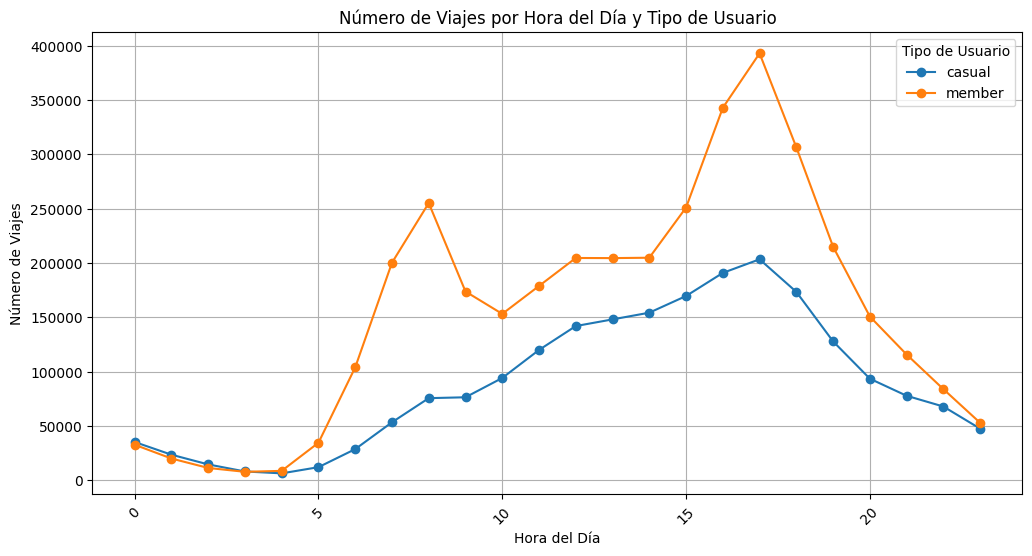

In [18]:
# Graficar el recuento de viajes por hora y tipo de usuario
plt.figure(figsize=(12, 6))

# Crear gráfico de líneas por tipo de usuario
for tipo_usuario in trips_by_hour.index:
    plt.plot(trips_by_hour.columns, trips_by_hour.loc[tipo_usuario], label=tipo_usuario, marker='o')

# Añadir título y etiquetas
plt.title('Número de Viajes por Hora del Día y Tipo de Usuario')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=45)  # Rotar las etiquetas de las horas
plt.grid(True)

# Mostrar la leyenda
plt.legend(title='Tipo de Usuario')

Distribución de latitudes y longitudes de estacionescantidad de viajes por estación

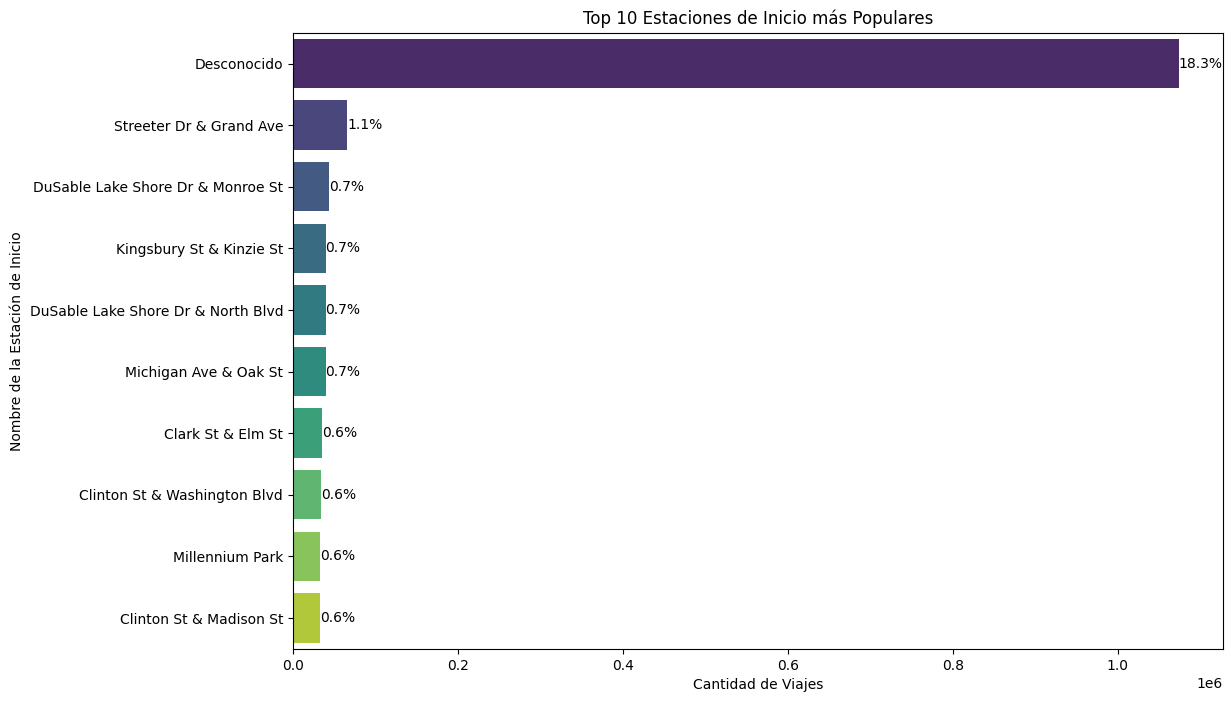

In [12]:
# Seleccionar las 10 estaciones de inicio más populares
top_estaciones = df_analisis['nombre_estacion_inicio'].value_counts().head(10)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(12, 8))
ax = sns.barplot(y=top_estaciones.index, x=top_estaciones.values, hue=top_estaciones.index, palette='viridis', legend=False)
plt.title('Top 10 Estaciones de Inicio más Populares')
plt.xlabel('Cantidad de Viajes')
plt.ylabel('Nombre de la Estación de Inicio')

# Agregar los porcentajes al lado de cada barra
total_viajes = df_analisis.shape[0]
for i, value in enumerate(top_estaciones.values):
    percentage = f'{(value / total_viajes) * 100:.1f}%'
    ax.text(value + 5, i, percentage, va='center', fontsize=10, color='black')

plt.show()

Conteo de tipo de clientes:
tipo_usuario
member    3707005
casual    2145244
Name: count, dtype: int64

Porcentaje de tipo de clientes:
tipo_usuario
member    63.343255
casual    36.656745
Name: proportion, dtype: float64


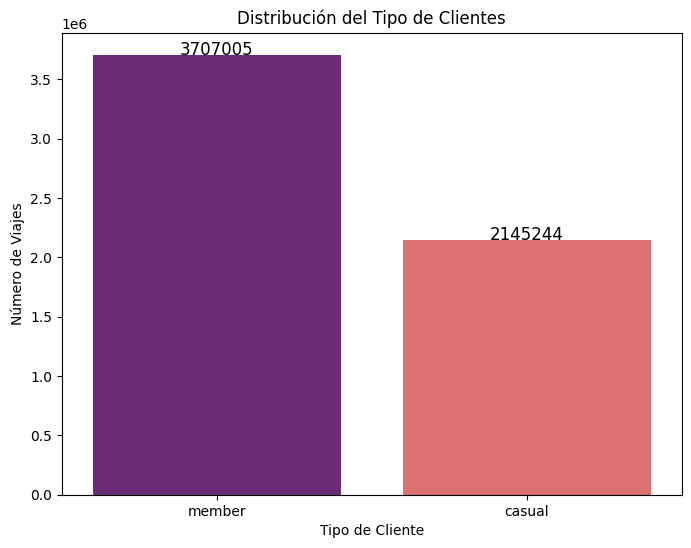

In [ ]:
# Calcular conteo y porcentaje de cada tipo de cliente
conteo_clientes = df_analisis['tipo_usuario'].value_counts()
porcentaje_clientes = df_analisis['tipo_usuario'].value_counts(normalize=True) * 100

print("Conteo de tipo de clientes:")
print(conteo_clientes)
print("\nPorcentaje de tipo de clientes:")
print(porcentaje_clientes)

# 2. Visualización: Gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='tipo_usuario', data=df_analisis, hue='tipo_usuario', palette='magma', legend=False)
plt.title('Distribución del Tipo de Clientes')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Número de Viajes')

# Agregar las etiquetas con el conteo sobre cada barra
for index, value in enumerate(conteo_clientes):
    ax.text(index, value + 100, f'{value}', ha='center', fontsize=12)
plt.show()

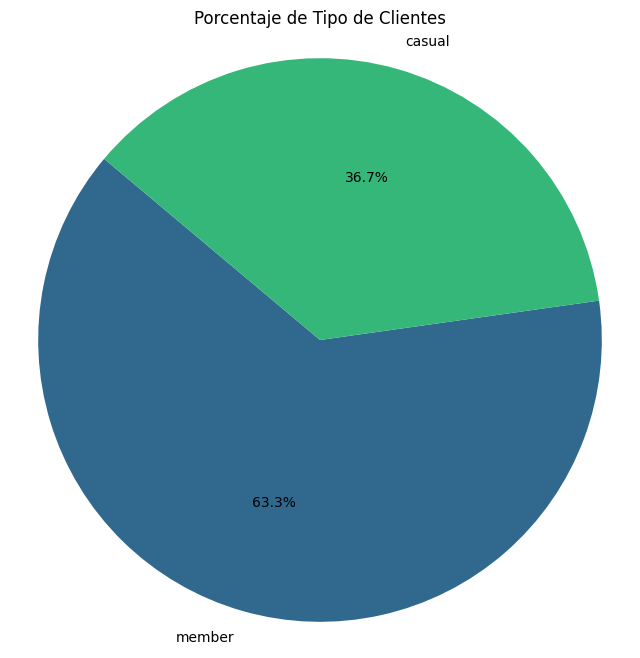

In [ ]:
#Visualización: Gráfico circular (pie chart)

plt.figure(figsize=(8, 8))
colors = sns.color_palette('viridis', n_colors=len(conteo_clientes))
plt.pie(conteo_clientes, labels=conteo_clientes.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Porcentaje de Tipo de Clientes')
plt.axis('equal')  # Para que el pie se vea como un círculo
plt.show()




Duración promedio de viajes (minutos) por tipo de cliente:
tipo_usuario
casual    0.348768
member    0.203250
Name: duracion_viaje_min, dtype: float64


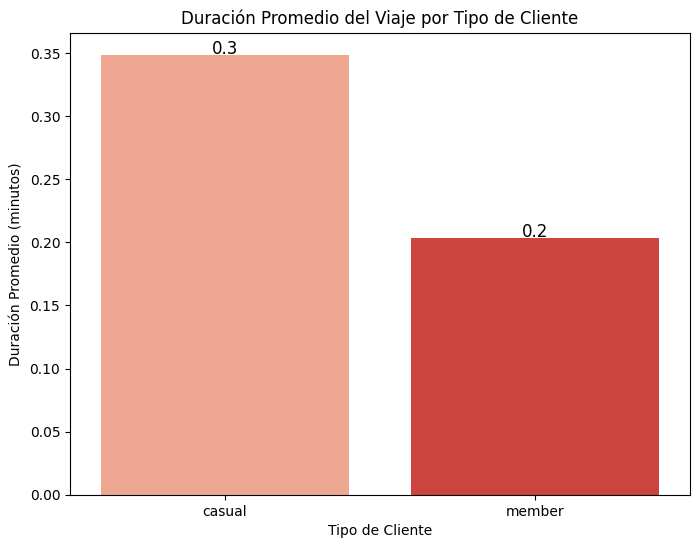

In [ ]:
# Comparar la duración promedio de los viajes por tipo de cliente
# Convertir la duración a minutos en caso de que esté en segundos (ajusta según tu DataFrame)
# Aquí se asume que 'duracion_viaje' está en segundos. Si ya está en minutos, omite la división.
df_analisis['duracion_viaje_min'] = df_analisis['duracion_viaje'] / 60

duracion_promedio = df_analisis.groupby('tipo_usuario')['duracion_viaje_min'].mean()

print("\nDuración promedio de viajes (minutos) por tipo de cliente:")
print(duracion_promedio)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=duracion_promedio.index, y=duracion_promedio.values, hue=duracion_promedio.index, palette='Reds', legend=False)
plt.title('Duración Promedio del Viaje por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Duración Promedio (minutos)')

# Ajustar la posición de las etiquetas sobre las barras
for index, value in enumerate(duracion_promedio.values):
    ax.text(index, value + 0.001, f'{value:.1f}', ha='center', fontsize=12)
plt.show()